## THE SPARKS FOUNDATION

### Internship Task - 1 : PREDICTION USING SUPERVISED ML

### Predicting the percentage of an student based on the no. of study hours

### By : Ashutosh Kar

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sn

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


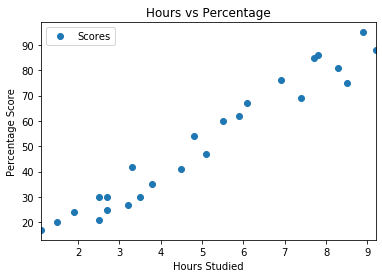

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


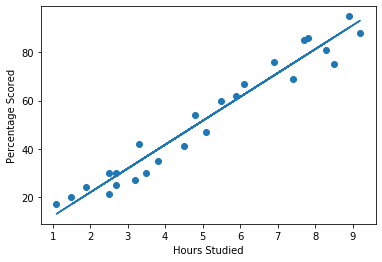

In [10]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Scored')
plt.show()

In [11]:
print(X_test)
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
df = pd.DataFrame({'Actual Percentage': y_test, 'Predicted Percentage': y_pred})  
df 

,Actual Percentage,Predicted Percentage
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting the score for a student who studies for 9.25hrs/day 

In [16]:
hours = 9.25
ar=np.array(hours)
hours=ar.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
